In [2]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [44]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("data/GenInfo_only_M5.root")
# file = uproot.open("data/GenInfo_only_M3p7.root")
RHTree = file["fevt/RHTree"]

In [45]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [46]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_H_AA_4Tau_M_5_signal_kinematics'
# out_dir='data/plot_H_AA_4Tau_M_3p7_signal_kinematics'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [33]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
GenA1

entry  subentry
0      0           5.000000
1      0           4.999996
2      0           5.000002
3      0           4.999999
4      0           5.000017
                     ...   
1607   0           5.000000
1608   0           5.000177
1609   0           4.999999
1610   0           4.999990
1611   0           4.999992
Name: GenA1, Length: 1468, dtype: float32

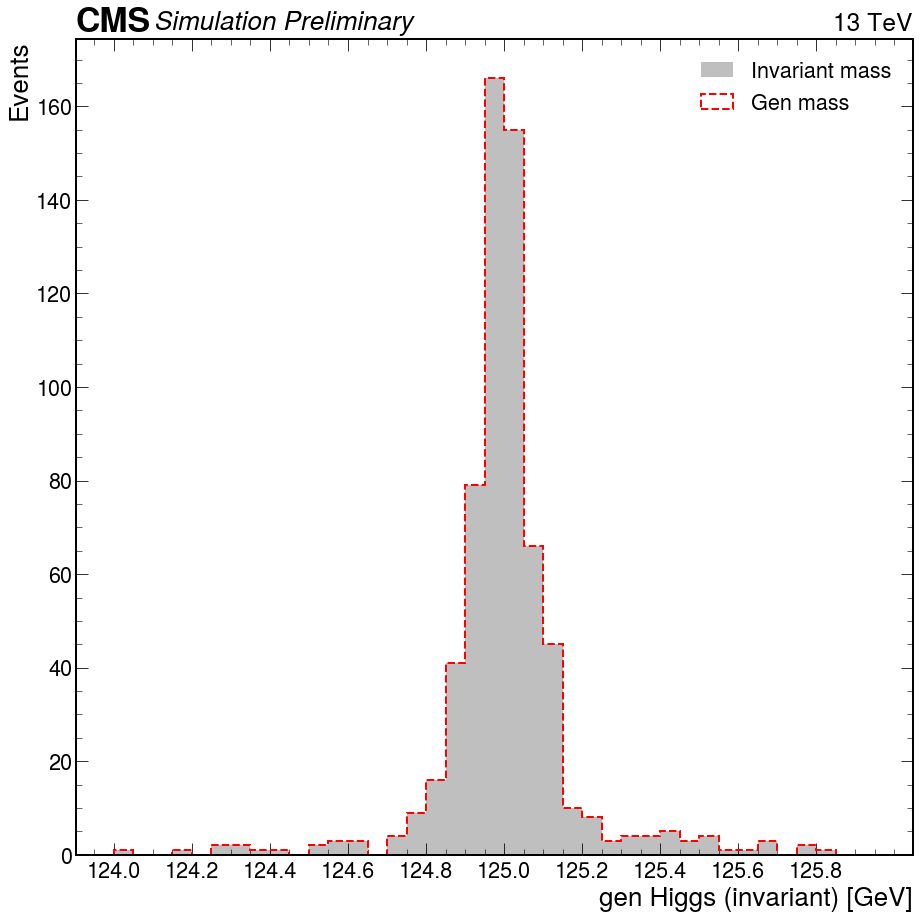

In [6]:
GenHiggs_invariant = RHTree.arrays(["GenHiggs_inv"],"GenHiggs_inv > -111",library="pd")['GenHiggs_inv']
GenHiggs = RHTree.arrays(["GenHiggs"],"GenHiggs > -111",library="pd")['GenHiggs']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenHiggs_invariant,bins=np.arange(124,126,0.05),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenHiggs,bins=np.arange(124,126,0.05),histtype='step',linestyle='--',linewidth=2, color='red',label="Gen mass")
plt.xticks(np.arange(124,126,0.2))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Higgs (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

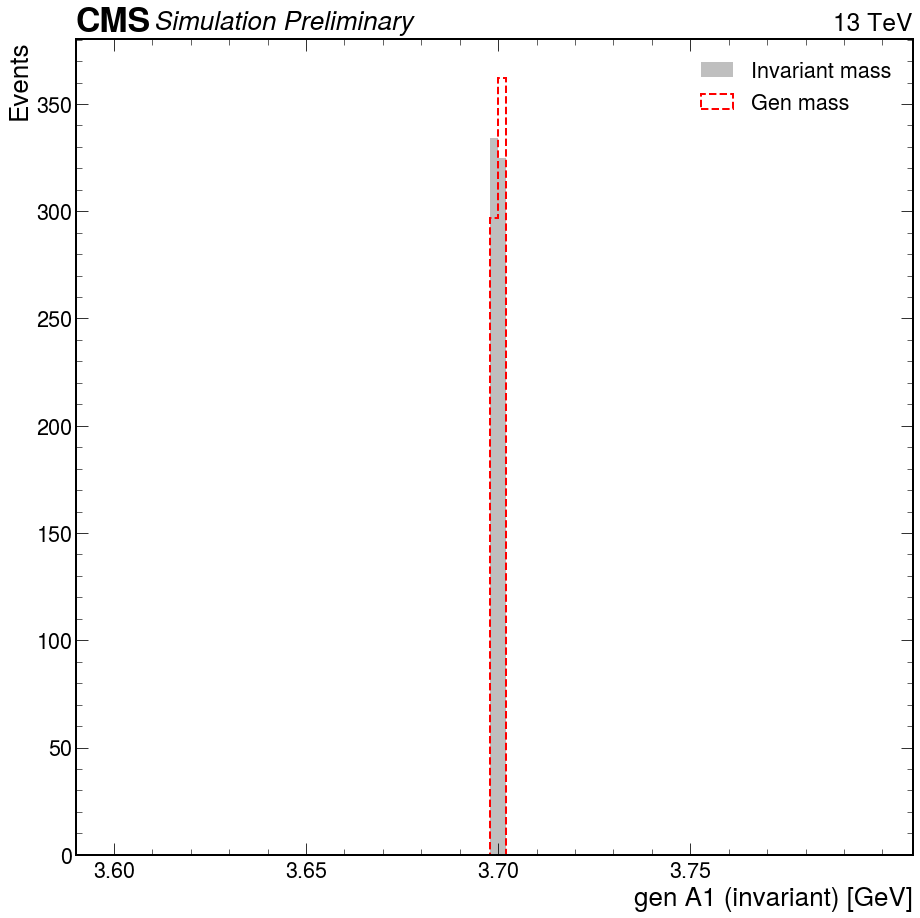

In [500]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(3.6,3.8,0.002),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA1,bins=np.arange(3.6,3.8,0.002),histtype='step',linestyle='--',linewidth=2, color='red',label="Gen mass")
plt.xticks(np.arange(3.6,3.8,0.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A1 (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A1_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

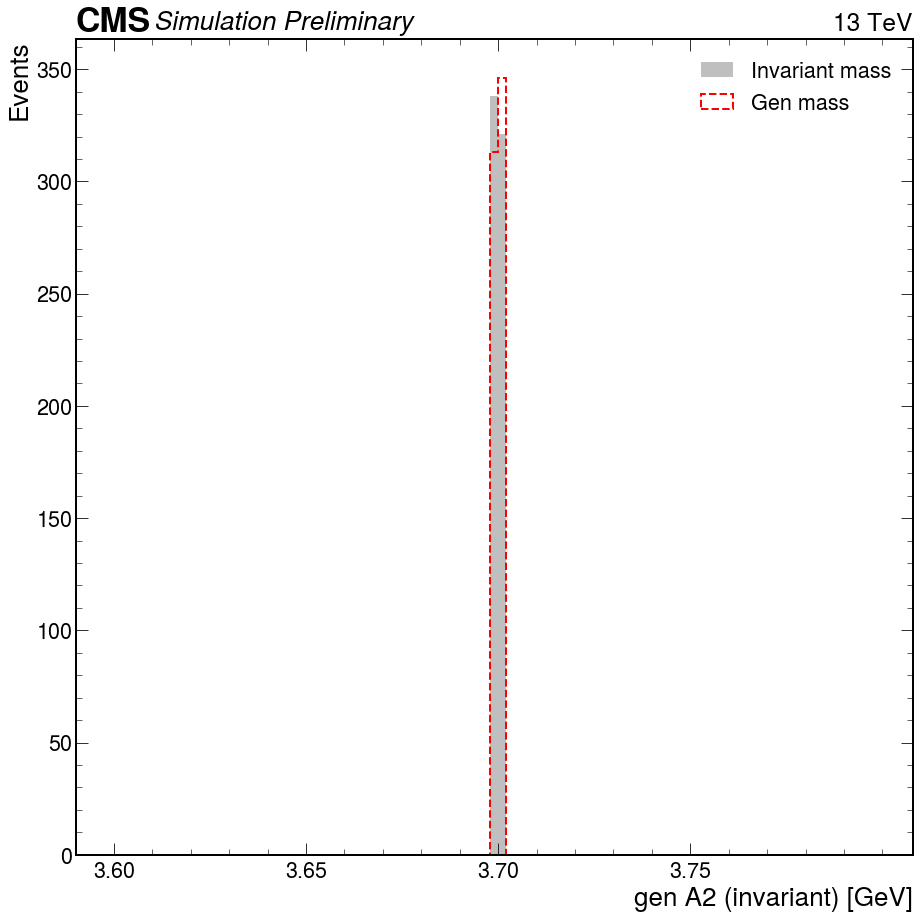

In [501]:
GenA2_invariant = RHTree.arrays(["GenA2_inv"],"GenA2_inv > -111",library="pd")['GenA2_inv']
GenA2 = RHTree.arrays(["GenA2"],"GenA2 > -111",library="pd")['GenA2']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA2_invariant,bins=np.arange(3.6,3.8,0.002),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA2,bins=np.arange(3.6,3.8,0.002),histtype='step',linestyle='--',linewidth=2, color='red',label="Gen mass")
plt.xticks(np.arange(3.6,3.8,0.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A2 (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A2_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

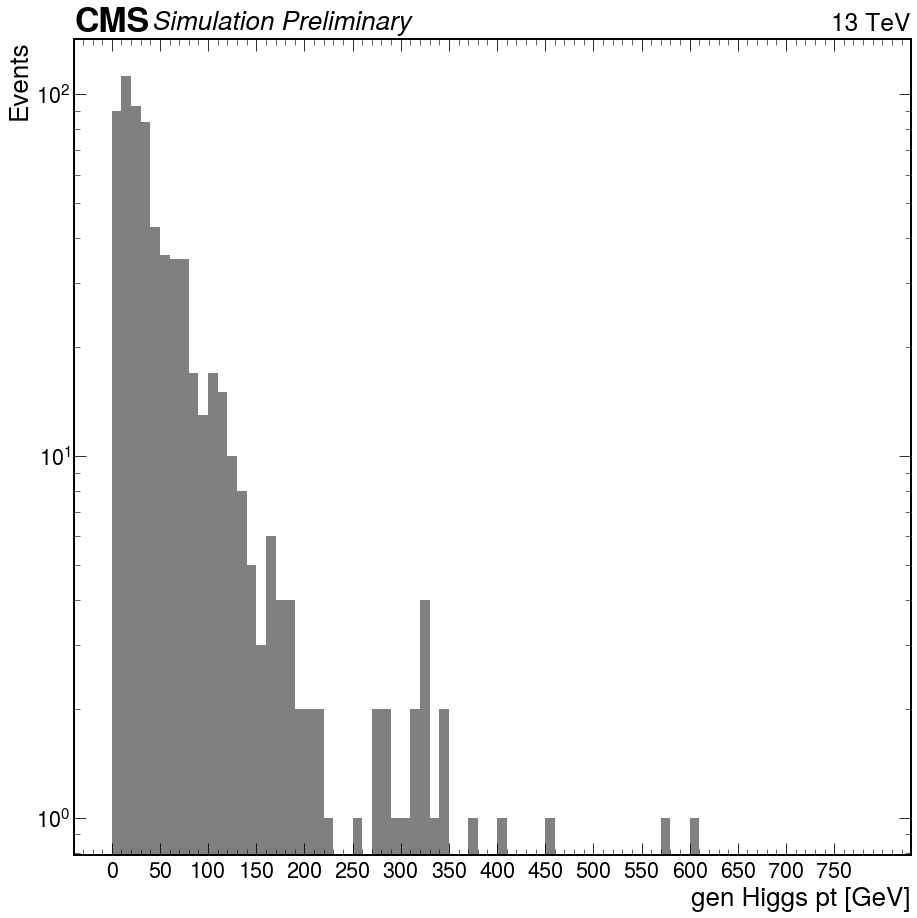

In [502]:
H_pt = RHTree.arrays(["H_pt"],"H_pt > -1",library="pd")['H_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_pt,bins=np.arange(0,800,10),color='grey',label="Higgs pt",log=True)
plt.xticks(np.arange(0,800,50))
plt.ylabel("Events")
plt.xlabel("gen Higgs pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

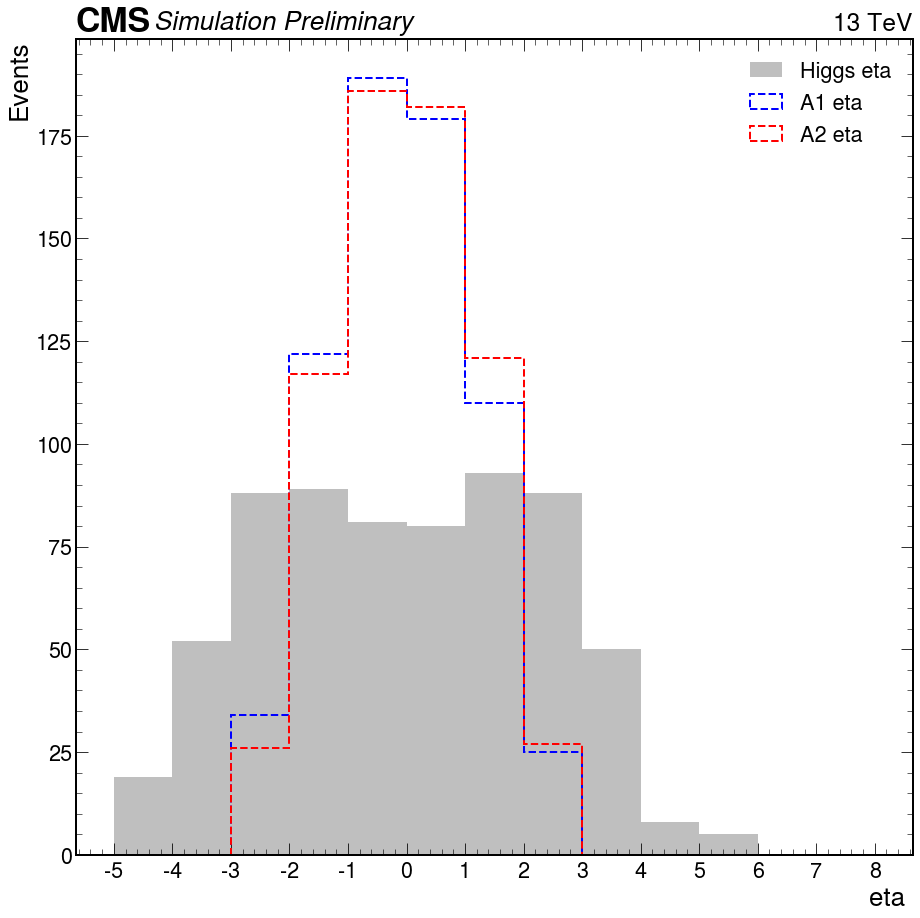

In [503]:
H_eta = RHTree.arrays(["H_eta"],"H_eta > -111",library="pd")['H_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
A2_eta = RHTree.arrays(["A2_eta"],"A2_eta > -111",library="pd")['A2_eta']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_eta,bins=np.arange(-5,9,1),color='grey',alpha=0.5,label="Higgs eta")
plt.hist(A1_eta,bins=np.arange(-5,9,1),histtype='step',linestyle='--',linewidth=2,color='b',label="A1 eta")
plt.hist(A2_eta,bins=np.arange(-5,9,1),histtype='step',linestyle='--',linewidth=2,color='r',label="A2 eta")
plt.xticks(np.arange(-5,9,1))
plt.legend()
plt.ylabel("Events")
plt.xlabel("eta ")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_A1_A2_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

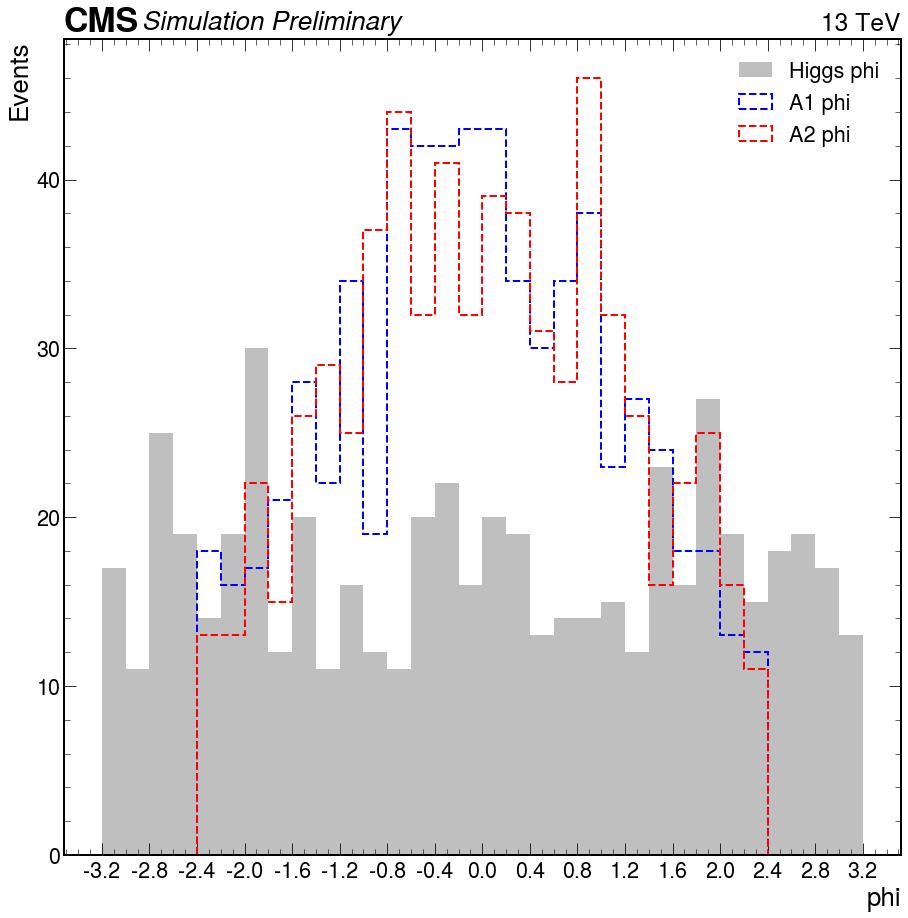

In [504]:
H_phi = RHTree.arrays(["H_phi"],"H_phi > -111",library="pd")['H_phi']
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
A2_phi = RHTree.arrays(["A2_phi"],"A2_phi > -111",library="pd")['A2_phi']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(H_eta,bins=np.arange(-3.2,3.4,.2),color='grey',alpha=0.5,label="Higgs phi")
plt.hist(A1_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="A1 phi")
plt.hist(A2_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="A2 phi")
plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_higgs_A1_A2_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

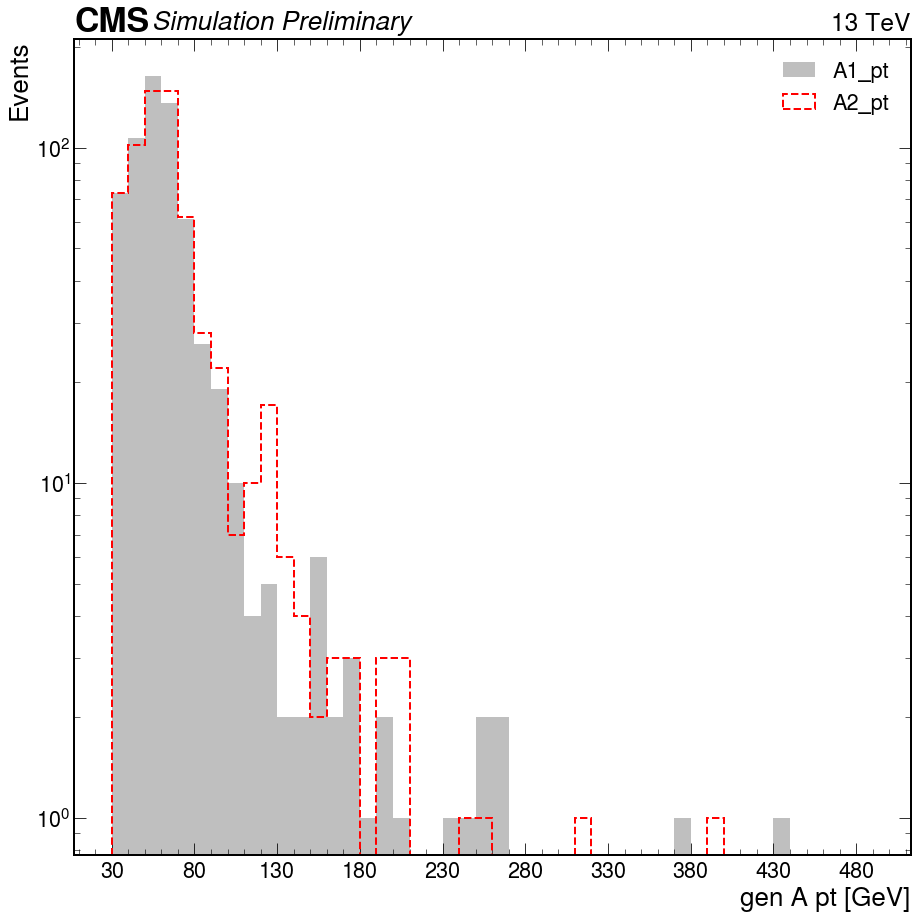

In [505]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
A2_pt = RHTree.arrays(["A2_pt"],"A2_pt > -111",library="pd")['A2_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(30,500,10),color='grey',alpha=0.5,label="A1_pt",log=True)
plt.hist(A2_pt,bins=np.arange(30,500,10),histtype='step',linestyle='--',linewidth=2, color='red',label="A2_pt",log=True)
plt.xticks(np.arange(30,500,50))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

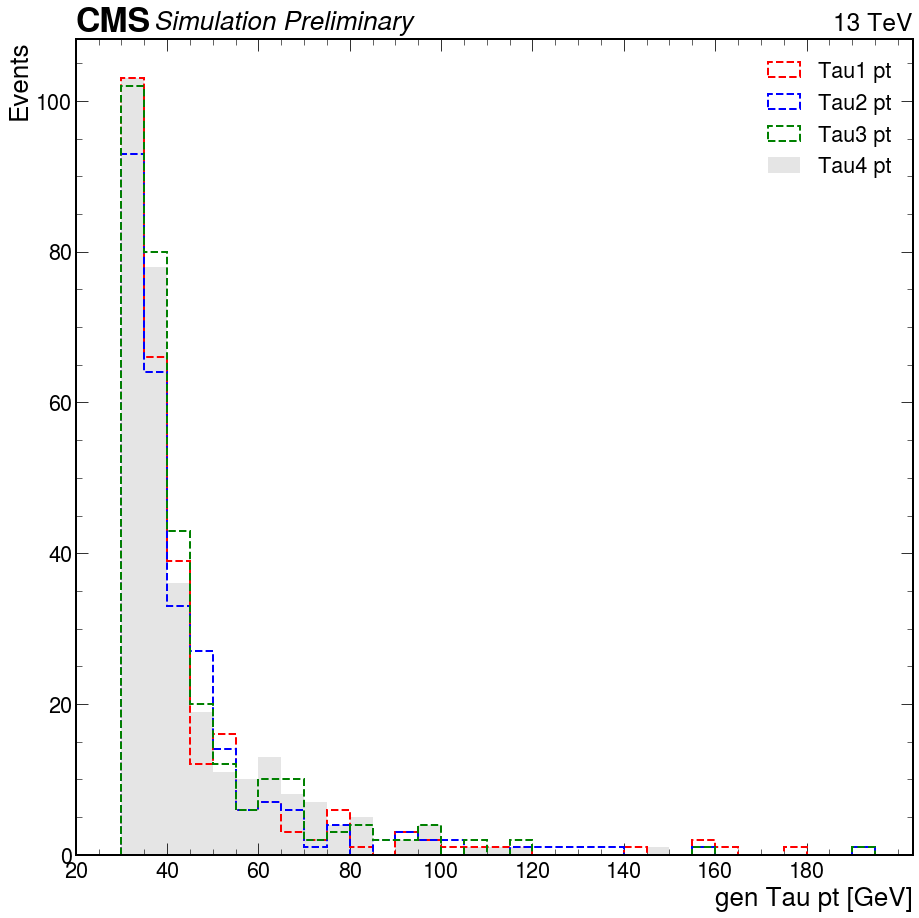

In [506]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
Tau3_pt = RHTree.arrays(["Tau3_pt"],"Tau3_pt > -111",library="pd")['Tau3_pt']
Tau4_pt = RHTree.arrays(["Tau4_pt"],"Tau4_pt > -111",library="pd")['Tau4_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")
plt.hist(Tau3_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 pt")
plt.hist(Tau4_pt,bins=np.arange(30,200,5), color='grey',alpha=0.2,label="Tau4 pt")
plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

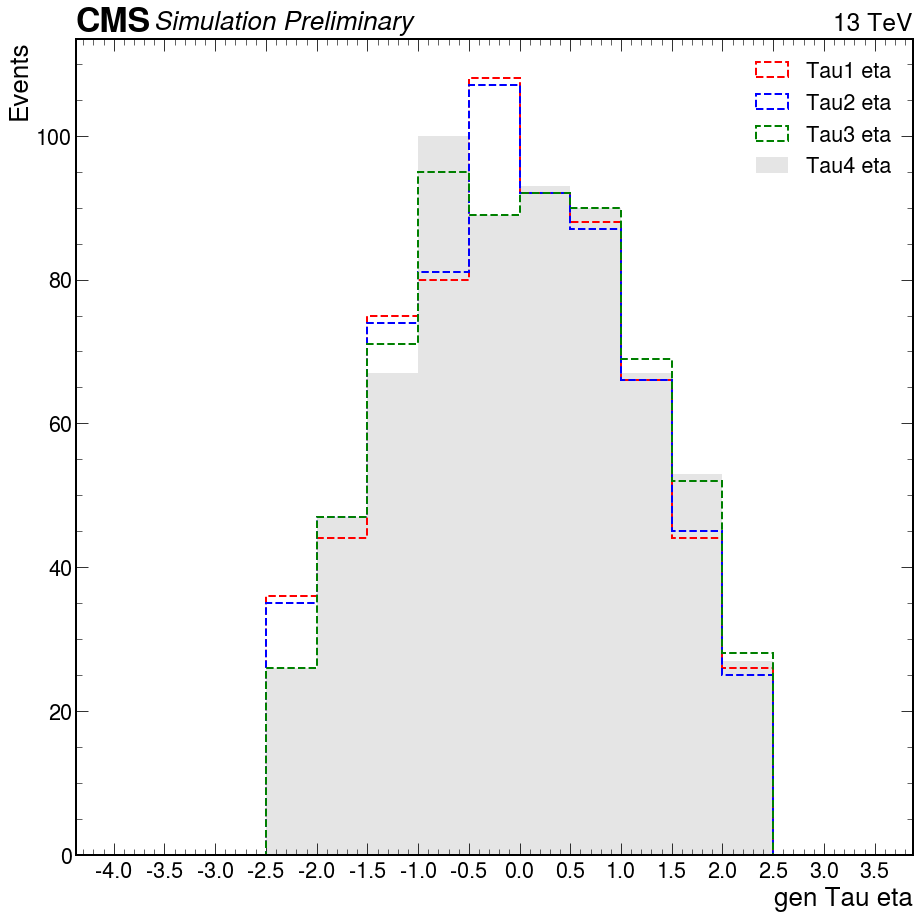

In [507]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
Tau3_eta = RHTree.arrays(["Tau3_eta"],"Tau3_eta > -111",library="pd")['Tau3_eta']
Tau4_eta = RHTree.arrays(["Tau4_eta"],"Tau4_eta > -111",library="pd")['Tau4_eta']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 eta")
plt.hist(Tau3_eta,bins=np.arange(-4,4,.5),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 eta")
plt.hist(Tau4_eta,bins=np.arange(-4,4,.5), color='grey',alpha=0.2,label="Tau4 eta")
plt.xticks(np.arange(-4,4,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

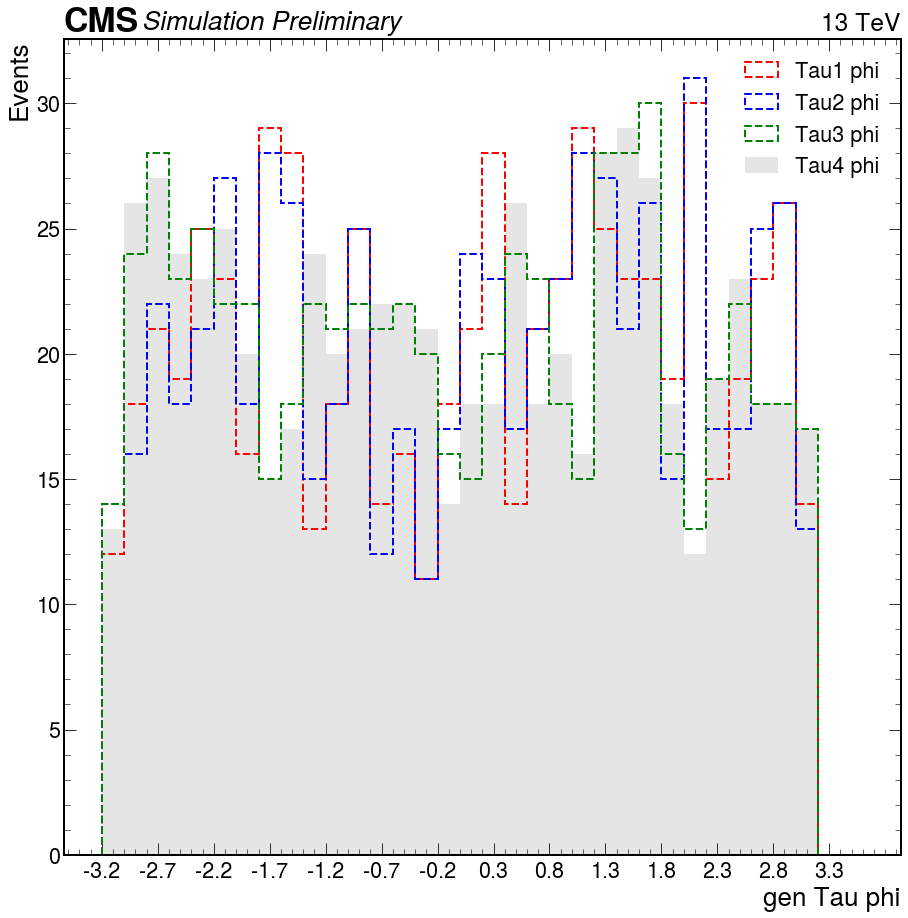

In [508]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
Tau2_phi = RHTree.arrays(["Tau2_phi"],"Tau2_phi > -111",library="pd")['Tau2_phi']
Tau3_phi = RHTree.arrays(["Tau3_phi"],"Tau3_phi > -111",library="pd")['Tau3_phi']
Tau4_phi = RHTree.arrays(["Tau4_phi"],"Tau4_phi > -111",library="pd")['Tau4_phi']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 phi")
plt.hist(Tau2_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 phi")
plt.hist(Tau3_phi,bins=np.arange(-3.2,3.8,.2),histtype='step',linestyle='--',linewidth=2, color='g',label="Tau3 phi")
plt.hist(Tau4_phi,bins=np.arange(-3.2,3.8,.2), color='grey',alpha=0.2,label="Tau4 phi")
plt.xticks(np.arange(-3.2,3.8,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

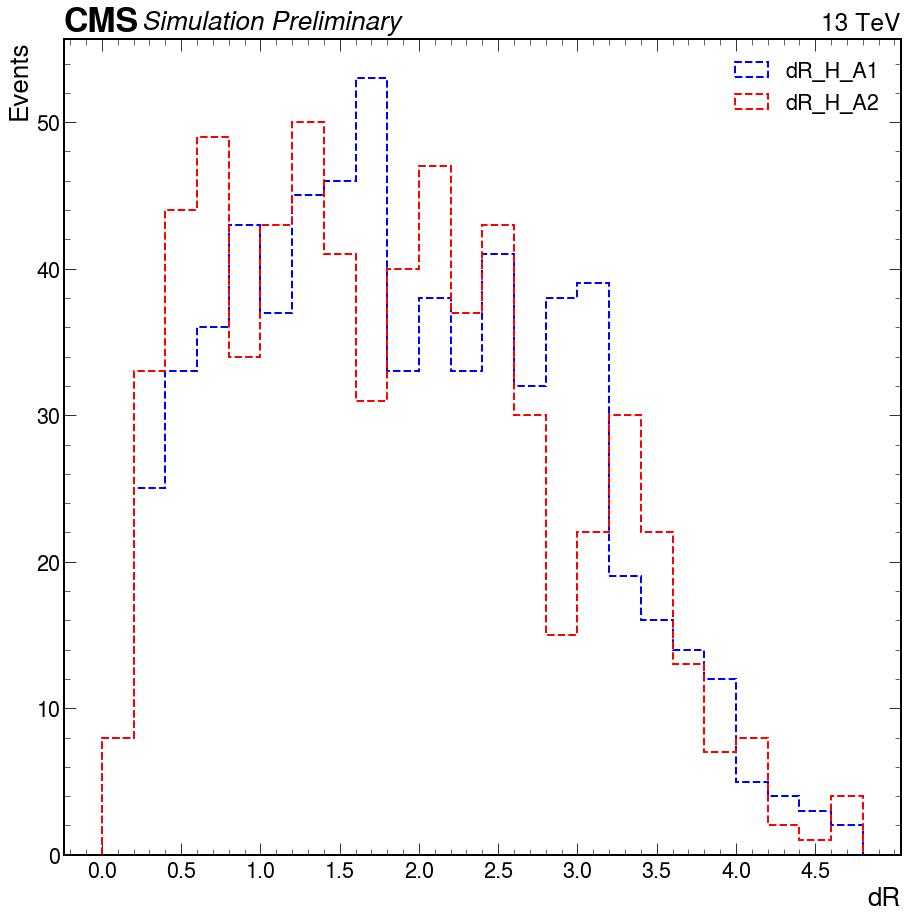

In [509]:
dR_H_A1 = RHTree.arrays(["dR_H_A1"],"dR_H_A1 > -111",library="pd")['dR_H_A1']
dR_H_A2 = RHTree.arrays(["dR_H_A2"],"dR_H_A2 > -111",library="pd")['dR_H_A2']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_H_A1,bins=np.arange(0,5,.2),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_H_A1")
plt.hist(dR_H_A2,bins=np.arange(0,5,.2),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_H_A2")
plt.xticks(np.arange(0,5,.5))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_H_A_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

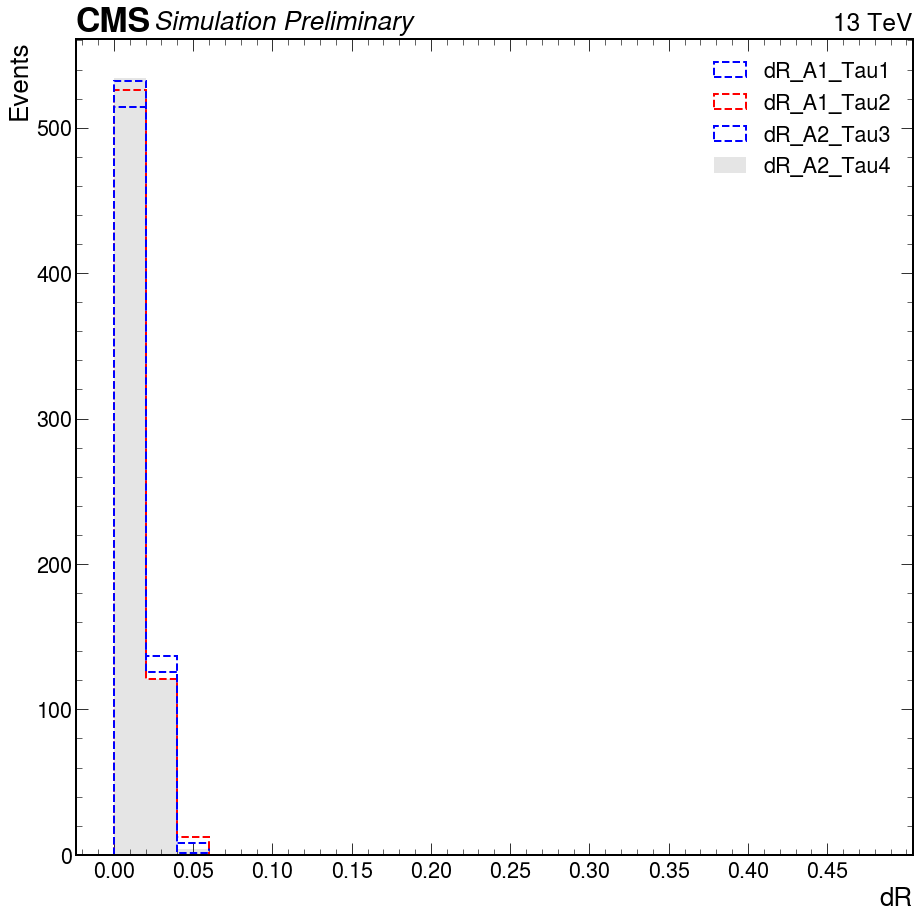

In [510]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']
dR_A2_Tau3 = RHTree.arrays(["dR_A2_Tau3"],"dR_A2_Tau3 > -111",library="pd")['dR_A2_Tau3']
dR_A2_Tau4 = RHTree.arrays(["dR_A2_Tau4"],"dR_A2_Tau4 > -111",library="pd")['dR_A2_Tau4']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")
plt.hist(dR_A2_Tau3,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A2_Tau3")
plt.hist(dR_A2_Tau4,bins=np.arange(0,.5,.02), color='grey',alpha=0.2,label="dR_A2_Tau4")
plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

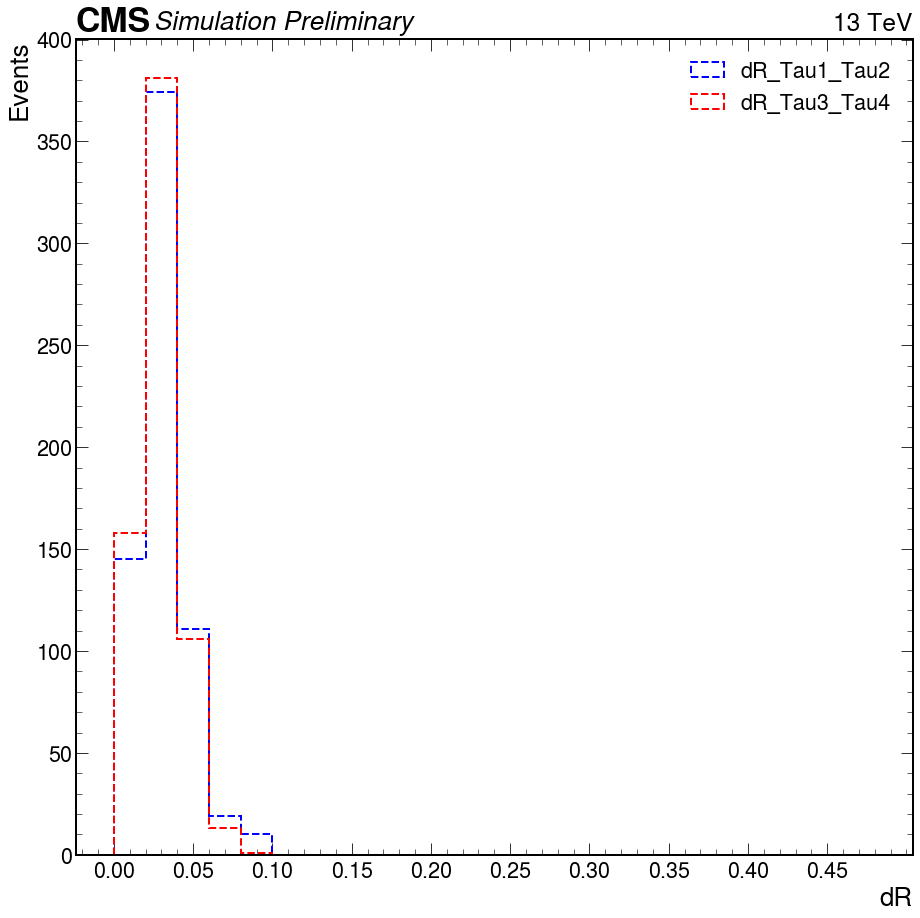

In [511]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau3_Tau4 = RHTree.arrays(["dR_Tau3_Tau4"],"dR_Tau3_Tau4 > -111",library="pd")['dR_Tau3_Tau4']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")
plt.hist(dR_Tau3_Tau4,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_Tau3_Tau4")
plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

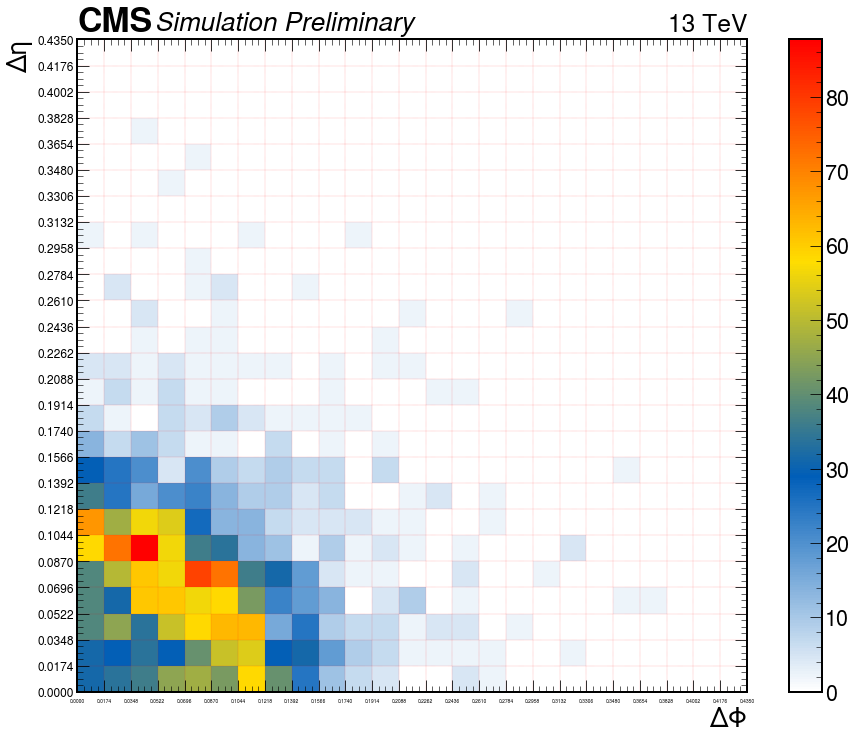

In [37]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
fig, ax = plt.subplots(figsize=(15,12))
plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
plt.xticks(np.arange(0,.44,0.0174),size=5)
plt.yticks(np.arange(0,.44,0.0174),size=12)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

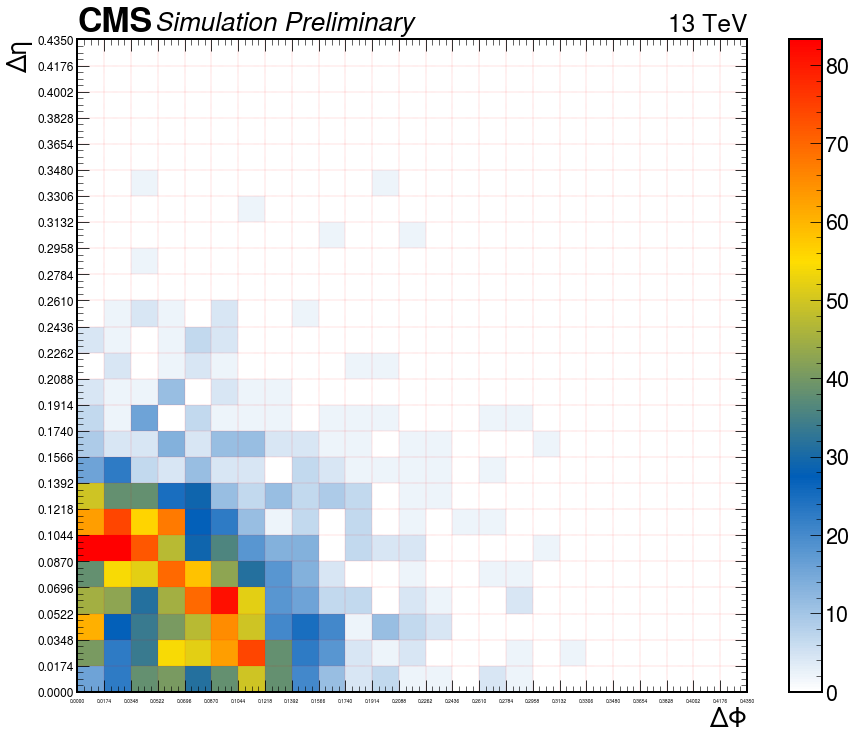

In [38]:
Tau3_Tau4_dphi = RHTree.arrays(["Tau3_Tau4_dphi"],"Tau3_Tau4_dphi > -111",library="pd")['Tau3_Tau4_dphi']
Tau3_Tau4_deta = RHTree.arrays(["Tau3_Tau4_deta"],"Tau3_Tau4_deta > -111",library="pd")['Tau3_Tau4_deta']
fig, ax = plt.subplots(figsize=(15,12))
plt.hist2d( Tau3_Tau4_dphi, Tau3_Tau4_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
plt.xticks(np.arange(0,.44,0.0174),size=5)
plt.yticks(np.arange(0,.44,0.0174),size=12)
x_grid_positions = np.arange(0, .44, 0.0174)
y_grid_positions = np.arange(0, .44, 0.0174)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau3_Tau4_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

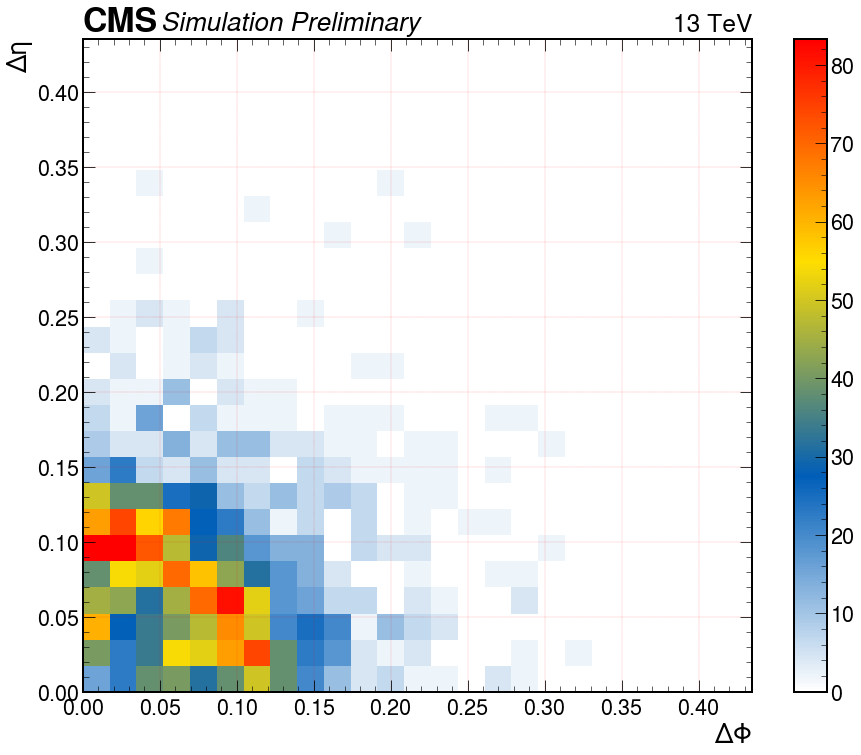

In [7]:
Tau3_Tau4_dphi = RHTree.arrays(["Tau3_Tau4_dphi"],"Tau3_Tau4_dphi > -111",library="pd")['Tau3_Tau4_dphi']
Tau3_Tau4_deta = RHTree.arrays(["Tau3_Tau4_deta"],"Tau3_Tau4_deta > -111",library="pd")['Tau3_Tau4_deta']
fig, ax = plt.subplots(figsize=(15, 12))
plt.hist2d(Tau3_Tau4_dphi, Tau3_Tau4_deta, bins=[np.arange(0, .44, 0.0174), np.arange(0, .44, 0.0174)], cmap=cms_cmap, density=True)
plt.colorbar()
x_grid_positions = np.arange(0, .44, 0.0174)
y_grid_positions = np.arange(0, .44, 0.0174)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau3_Tau4_dphi_deta_2D_hist.png'%(out_dir), bbox_inches='tight', dpi=300, facecolor="w")
plt.show()


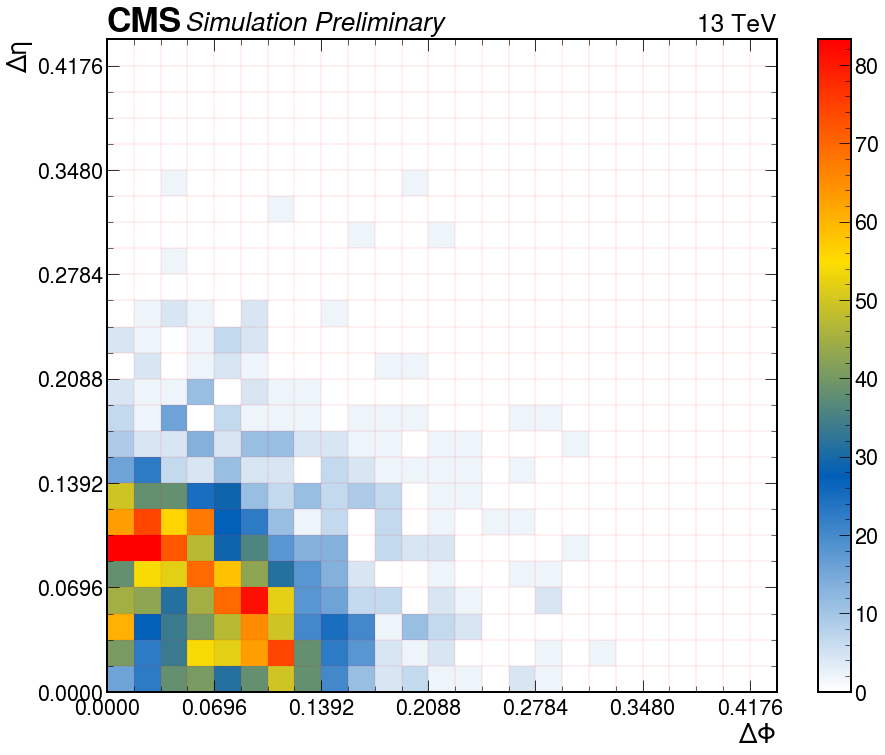

In [40]:
x_bins = np.arange(0, 0.44, 0.0174)
y_bins = np.arange(0, 0.44, 0.0174)

fig, ax = plt.subplots(figsize=(15, 12))
hist, x_edges, y_edges, im = plt.hist2d(Tau3_Tau4_dphi, Tau3_Tau4_deta, bins=[x_bins, y_bins], cmap=cms_cmap, density=True)
plt.colorbar()

# Add minor ticks for grid lines
ax.set_xticks(np.arange(0, 0.44, 0.0174), minor=True)
ax.set_yticks(np.arange(0, 0.44, 0.0174), minor=True)

# Plot grid lines
ax.grid(which='both', color='r', linestyle='--', linewidth=0.2)
plt.xticks(np.arange(0,.44,4*0.0174))
plt.yticks(np.arange(0,.44,4*0.0174))
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

if save:
    plt.savefig('%s/Tau3_Tau4_dphi_deta_2D_hist.png' % (out_dir), bbox_inches='tight', dpi=300, facecolor="w")

plt.show()


In [9]:
len(Tau1_Tau2_dphi)

1468

In [28]:
len(pd.concat([Tau1_Tau2_dphi, Tau3_Tau4_dphi], ignore_index=True))

2936

In [14]:
type(Tau1_Tau2_deta)

pandas.core.series.Series

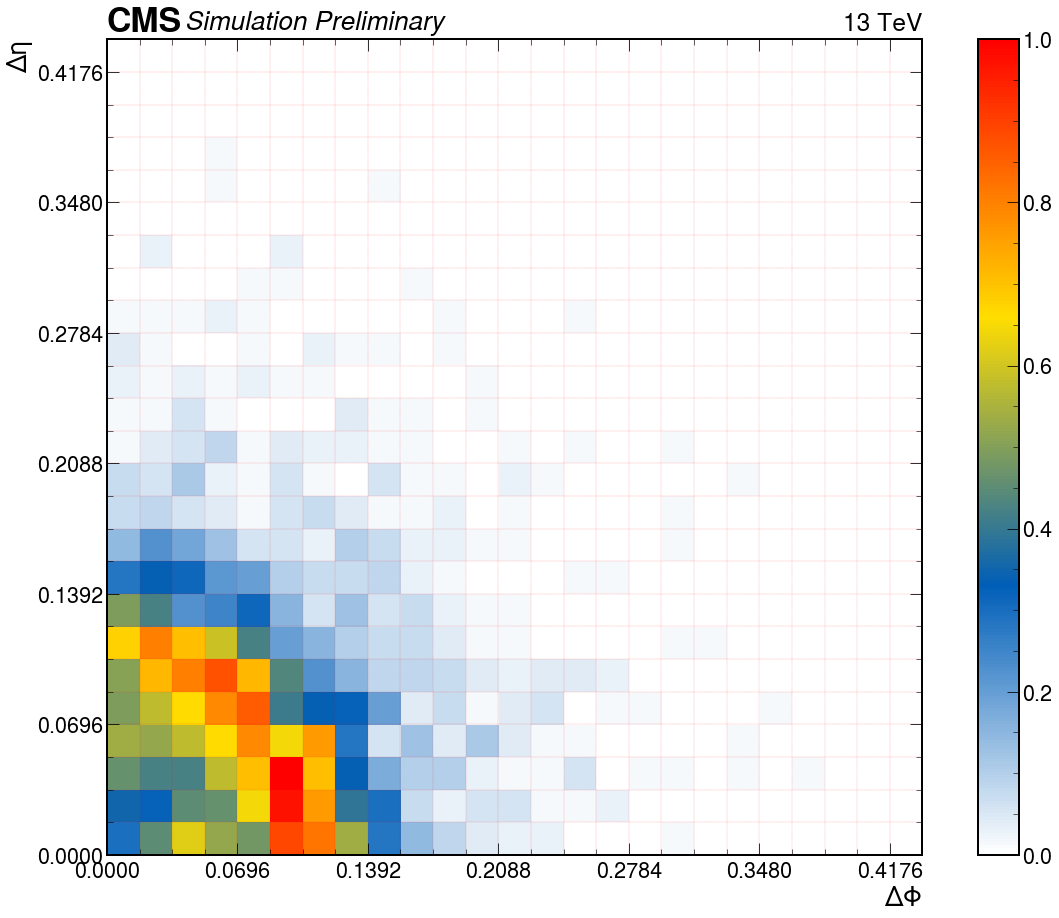

In [48]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
Tau3_Tau4_dphi = RHTree.arrays(["Tau3_Tau4_dphi"],"Tau3_Tau4_dphi > -111",library="pd")['Tau3_Tau4_dphi']
Tau3_Tau4_deta = RHTree.arrays(["Tau3_Tau4_deta"],"Tau3_Tau4_deta > -111",library="pd")['Tau3_Tau4_deta']
deta=pd.concat([Tau1_Tau2_deta, Tau3_Tau4_deta], ignore_index=True)
dphi=pd.concat([Tau1_Tau2_dphi, Tau3_Tau4_dphi], ignore_index=True)



bins = np.arange(0, 0.44, 0.0174)
fig, ax = plt.subplots(figsize=(20,15))
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
H, xedges, yedges = np.histogram2d(dphi, deta,  bins =[bins, bins], density = True)
H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = ax.imshow(H_normalized, extent=extent, cmap=cms_cmap, interpolation='none',origin ='lower', norm=norm)
plt.colorbar(im, ax=ax)
# Add minor ticks for grid lines
ax.set_xticks(np.arange(0, 0.44, 0.0174), minor=True)
ax.set_yticks(np.arange(0, 0.44, 0.0174), minor=True)

# Plot grid lines
ax.grid(which='both', color='r', linestyle='--', linewidth=0.2)
plt.xticks(np.arange(0,.44,4*0.0174))
plt.yticks(np.arange(0,.44,4*0.0174))
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

if save:
    plt.savefig('%s/dphi_deta_2D_hist_M5.png' % (out_dir), bbox_inches='tight', dpi=300, facecolor="w")

plt.show()